In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('retail_sales.csv')  # Update with your exact CSV filename

# Show first 5 rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


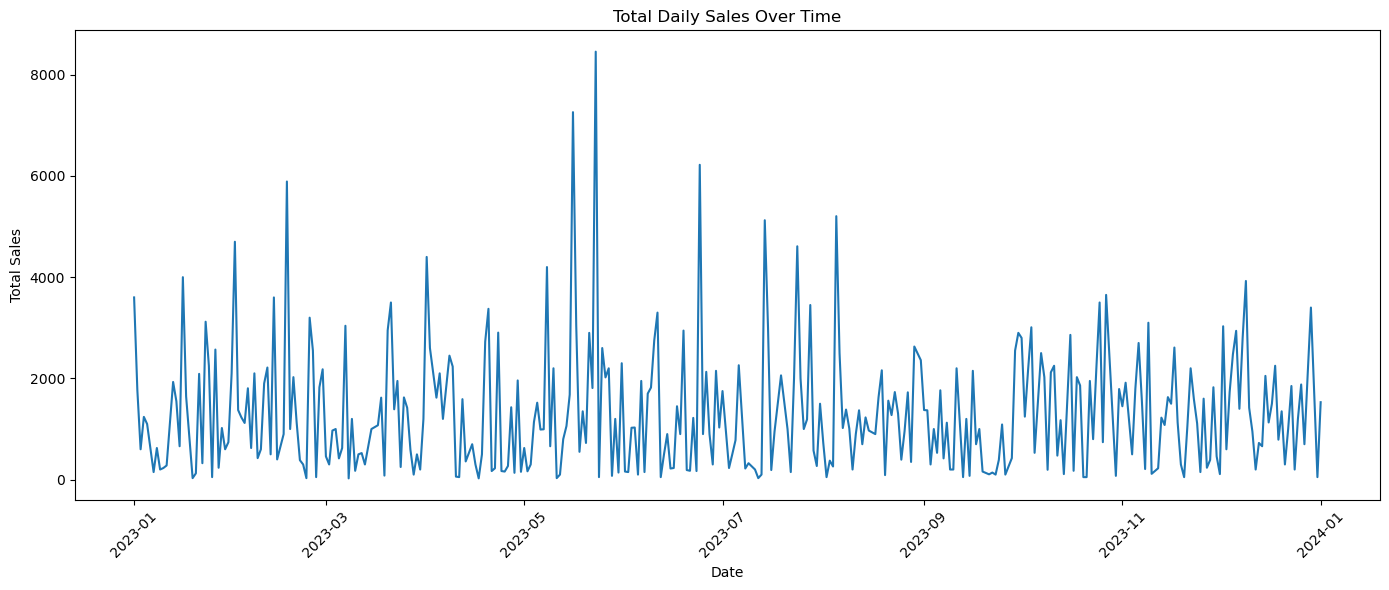

In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group sales by Date and sum total sales
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Plot total daily sales
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot image to your project folder
plt.savefig('total_daily_sales.png')

plt.show()

In [7]:
# Let's create lag features for 1, 2, and 3 previous days

daily_sales = daily_sales.to_frame()  # Convert Series to DataFrame

daily_sales['lag_1'] = daily_sales['Total Amount'].shift(1)
daily_sales['lag_2'] = daily_sales['Total Amount'].shift(2)
daily_sales['lag_3'] = daily_sales['Total Amount'].shift(3)

# Show the new data with lag features
daily_sales.head(10)

,Total Amount,lag_1,lag_2,lag_3
Date,,,,
2023-01-01,3600,NaN,NaN,NaN
2023-01-02,1765,3600.0,NaN,NaN
2023-01-03,600,1765.0,3600.0,NaN
2023-01-04,1240,600.0,1765.0,3600.0
2023-01-05,1100,1240.0,600.0,1765.0
2023-01-06,620,1100.0,1240.0,600.0
2023-01-07,150,620.0,1100.0,1240.0
2023-01-08,625,150.0,620.0,1100.0
2023-01-09,200,625.0,150.0,620.0


In [8]:
# Drop rows with NaN values
daily_sales_clean = daily_sales.dropna()

# Define features and target
X = daily_sales_clean[['lag_1', 'lag_2', 'lag_3']]
y = daily_sales_clean['Total Amount']

# Check the shape of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Show first 5 rows of features and target
print(X.head())
print(y.head())

Features shape: (342, 3)
Target shape: (342,)
             lag_1   lag_2   lag_3
Date                              
2023-01-04   600.0  1765.0  3600.0
2023-01-05  1240.0   600.0  1765.0
2023-01-06  1100.0  1240.0   600.0
2023-01-07   620.0  1100.0  1240.0
2023-01-08   150.0   620.0  1100.0
Date
2023-01-04    1240
2023-01-05    1100
2023-01-06     620
2023-01-07     150
2023-01-08     625
Name: Total Amount, dtype: int64


In [9]:
# Let's use 80% data for training, 20% for testing

split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 273
Testing samples: 69


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression MAE: 784.97
Linear Regression RMSE: 979.79


In [12]:
# Create rolling mean features on Total Amount
daily_sales_clean.loc[:, 'rolling_mean_3'] = daily_sales_clean['Total Amount'].rolling(window=3).mean()
daily_sales_clean.loc[:, 'rolling_mean_7'] = daily_sales_clean['Total Amount'].rolling(window=7).mean()

# Drop any new NaNs caused by rolling window
daily_sales_clean = daily_sales_clean.dropna()

# Update features and target with new columns
X = daily_sales_clean[['lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_mean_7']]
y = daily_sales_clean['Total Amount']

# Split again (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 264
Testing samples: 66


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression with Rolling Means MAE: {mae:.2f}")
print(f"Linear Regression with Rolling Means RMSE: {rmse:.2f}")

Linear Regression with Rolling Means MAE: 0.00
Linear Regression with Rolling Means RMSE: 0.00


In [14]:
print("y_test values:", y_test.values)
print("y_pred values:", y_pred)
print("Are y_test and y_pred exactly equal?", np.array_equal(y_test.values, y_pred))

y_test values: [3500  740 3650 1250   75 1790 1450 1915 1200  500 1800 2700 1560  210
 3100  115  225 1225 1080 1630 1500 2610 1130  300   50 1060 2200 1590
 1110  150 1600  235  390 1825  460  110 3030  600 1730 2475 2940 1400
 2800 3925 1420  950  200  725  660 2050 1130 1500 2250  790 1350  300
 1000 1850  200 1200 1880  700 2075 3400   50 1530]
y_pred values: [3500.  740. 3650. 1250.   75. 1790. 1450. 1915. 1200.  500. 1800. 2700.
 1560.  210. 3100.  115.  225. 1225. 1080. 1630. 1500. 2610. 1130.  300.
   50. 1060. 2200. 1590. 1110.  150. 1600.  235.  390. 1825.  460.  110.
 3030.  600. 1730. 2475. 2940. 1400. 2800. 3925. 1420.  950.  200.  725.
  660. 2050. 1130. 1500. 2250.  790. 1350.  300. 1000. 1850.  200. 1200.
 1880.  700. 2075. 3400.   50. 1530.]
Are y_test and y_pred exactly equal? False


In [15]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (66, 5)
y_test shape: (66,)


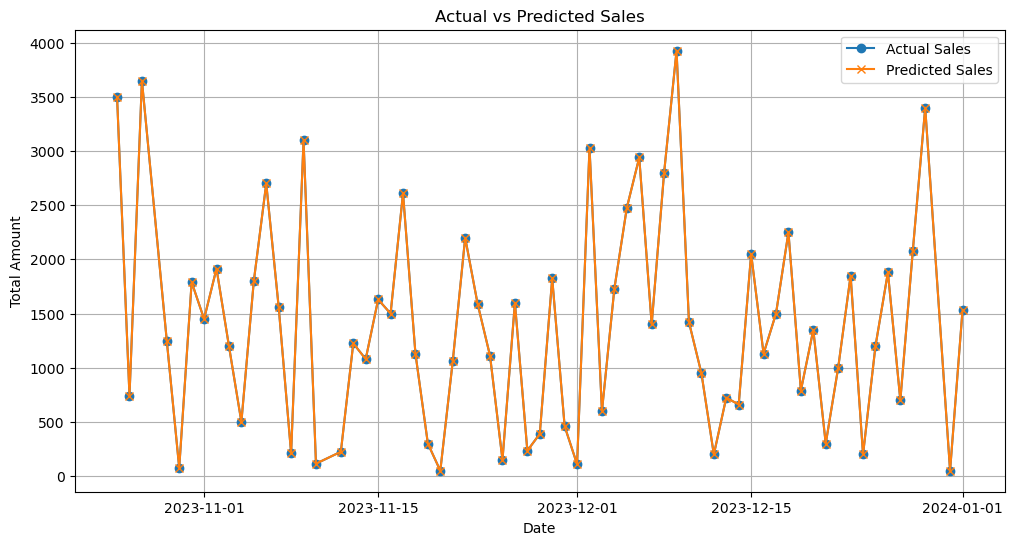

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/DELL/Desktop/Projects/Machine Learning Projects/Project 2 - Retail Demand Forecasting/actual_vs_predicted.png')
plt.show()

Random Forest MAE: 345.01
Random Forest RMSE: 478.01


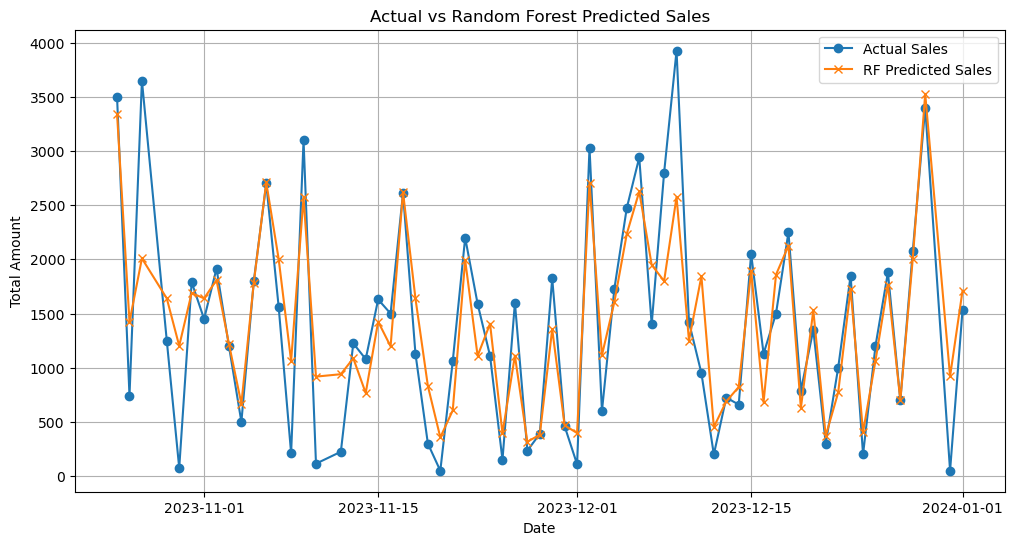

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with a fixed random seed for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate errors
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# Visualize predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_pred_rf, label='RF Predicted Sales', marker='x')
plt.title('Actual vs Random Forest Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/DELL/Desktop/Projects/Machine Learning Projects/Project 2 - Retail Demand Forecasting/rf_actual_vs_predicted.png')
plt.show()